# Single neuron tutorial

This exercice aims at understanding the capacities of a single artificial neuron.

First, some preliminaries that facilitate plotting and data access on Google drive ... just execute ! 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Magic used by the notebook to show figures inline
%matplotlib inline
# matplotlib default values
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading packages
%load_ext autoreload
%autoreload 2

random_seed = 4

In [0]:
import importlib.util
import sys
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My\ Drive/Colab\ Notebooks/dlia_course/practical_sessions/


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/dlia_course/practical_sessions


## Data for classification problems

The data below correspond to classification problems. Each input dataset $X$ contains points of $\mathbb{R}^2$. The output datasets $y$ give one of two classes, coded as $0$ or $1$, to each point.


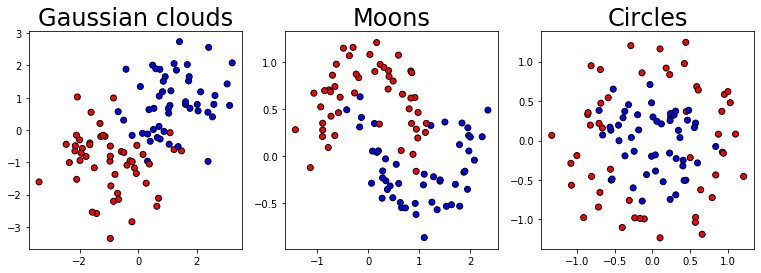

In [0]:
# Load and display data
from sklearn.datasets import make_moons, make_circles, make_blobs

figure = plt.figure(figsize=(13, 4))
cm = plt.cm.RdBu
cm_red_blue = ListedColormap(['#FF0000', '#0000FF'])

# Linearly separable
X_lin, y_lin = make_blobs(n_features=2, random_state=random_seed, centers=[[-1, -1], [1, 1]])
ax = plt.subplot(1, 3, 1)
ax.set_title("Gaussian clouds", fontsize=24)
ax.scatter(X_lin[:, 0], X_lin[:, 1], c=y_lin, cmap=cm_red_blue,
               edgecolors='k')

# Moons
X_moons, y_moons = make_moons(noise=0.2, random_state=random_seed)
ax = plt.subplot(1, 3, 2)
ax.set_title("Moons", fontsize=24)
ax.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap=cm_red_blue,
               edgecolors='k')

# Circles (factor: ratio between inner and outer circles radius)
X_circ, y_circ = make_circles(noise=0.2, factor=0.5, random_state=random_seed)
ax = plt.subplot(1, 3, 3)
ax.set_title("Circles", fontsize=24)
ax.scatter(X_circ[:, 0], X_circ[:, 1], c=y_circ, cmap=cm_red_blue,
               edgecolors='k')

datasets = {"lin": [X_lin, y_lin], "circ": [X_circ, y_circ], "moons": [X_moons, y_moons]}

plt.show()

In [0]:
# Choosing the data set that will be used in the following
my_set = "lin"  # can be any of "lin", "circ" or "moons"
X_sel = datasets[my_set][0]
y_sel = datasets[my_set][1]

## Artificial neuron

This neuron model takes two inputs $\textbf{x} = (x_0, x_1)$ , applies to them an affine transformation with weights $\textbf{w} = (w_0, w_1)$ and bias $b$ 

$$t = b + w_0 x_0 + w_1 x_1$$

and then sends the output through and activation function $g$:

$$(x_1, x_2) \mapsto g(b + w_0 x_0 + w_1 x_1)$$

The loss function here is the squared error.

**Assignment**: Below you will find an incomplete implementation of an artifical neuron. Please complete by replacing the assignments 



In [0]:
class ArtificialNeuron2d(object):
    """Artificial neuron with two inputs.
    
    Activation: to be chosen at instantiation time.
    Loss: squared error.
    Optimization method: backpropagation.
    """
    def __init__(self, act, random_state=None, sigma=0.01, nb_features=2):
        """Initialization
        
        Parameters:
        act: an activation class from activations.py.
        random_state: None means that no random seed is given.
        sigma: standard deviation of the normal random variable used for initializing the weights.
        """
        self.activation = act() # act is a class; has to be instantiated
        self.nb_features = nb_features
        np.random.seed(random_state)
        self.sigma = sigma
        self.w, self.b = self.init_weights()
        self.dL_dw = None
        self.dL_db = None
        self.dL_dt = None
        self.dL_dy = None
    
    def init_weights(self):
        return np.random.randn(self.nb_features) * self.sigma, np.random.randn(1) * self.sigma
    
    def predict(self, x):
        """Compute neuron prediction.
        
        x: numpy array containing 2 elements.
        """
        # implement the prediction function of the neuron
        y = self.activation(self.b + self.w.dot(x))
        # end of your code
        return y
    
    def print_gradients(self):
        print("dL/dy = ", self.dL_dy)
        print("dL/dt = ", self.dL_dt)
        print("dL/db = ", self.dL_db)
        print("dL/dw = ", self.dL_dw)
    
    def forward_back_propagation(self, x, y_gt, verbose=False):
        """Forward pass, backward pass, on a single sample.
        
        x: numpy array containing a single training sample (two coordinates).
        y_gt: expected output (ground-truth).
        verbose: toggles verbose mode
        
        Returns:
        L: loss value for the given input
        """
        # Compute forward pass and local gradients
        t = self.b + np.dot(self.w, x)
        # TODO: Replace the None by the correct expression.
        dt_dw = x
        dt_db = 1
        # end of your code
        
        y = self.activation(t)
        dy_dt = self.activation.grad(t)
        
        # calculate the loss (returned by this function)
        L = np.square(y - y_gt) 
        
        if verbose is True: print("Predicted output (y): ", y)
        
        # Back propagate gradient
        # TODO: Replace the None by the correct expression.
        self.dL_dy = 2*(y - y_gt)
        self.dL_dt = self.dL_dy * dy_dt
        self.dL_db = self.dL_dt * dt_db
        self.dL_dw = self.dL_dt * dt_dw
        # end of your code
        
        return L
        
    def update_parameters(self, learning_rate):

        # TODO: Update parameters
        self.b = self.b - learning_rate*self.dL_db
        self.w = self.w - learning_rate*self.dL_dw
        # end of your code

        return

    def batch_forward_back_propagation(self, x, y_gt, verbose=False):
        """Forward pass, backward pass with parameters update, on mini-batch.
        
        x: numpy array containing n training samples.
        y_gt: expected output (ground-truth).
        learning_rate: positive real value, typically smaller than 1.
        verbose: toggles verbose mode
        
        Returns:
        l: loss value for the given batch (before back propagation)
        """
        n = x.shape[0]
        # Compute forward pass and local gradients
        t = np.matmul(x, self.w) + self.b
        # TODO: Replace the None by the correct expression.
        dt_dw = x
        dt_db = np.ones(n)
        # end of your code
        
        y = self.activation(t)
        dy_dt = np.mean(self.activation.grad(t))
        
        # Note: this value is not used in the optimization. It is only returned by the function.
        L = np.mean((y - y_gt) ** 2)  # scalar
        if verbose is True: print("Predicted output (y): ", y)
        
        # Back propagate gradient
        # TODO: Replace the None by the correct expression.
        self.dL_dy = 2/n * (y - y_gt)
        self.dL_dt = self.dL_dy * dy_dt 
        self.dL_db = np.mean(self.dL_dt * dt_db)
        self.dL_dw = self.dL_dt.dot(dt_dw)
        # end of your code
        
        return L
        
        
    def fit(self, X, Y, epochs, learning_rate, batch=1, verbose=False):
        """Learn model using gradient descent.
        
        X: input examples
        Y: output examples
        learning_rate: learning rate
        batch: size of mini-batch
        verbose: toggle verbose mode
        """
        loss_hist = []
        for epoch in range(epochs):
            epoch_loss_list = []
            if batch == 1:
                for (x, y) in zip(X, Y):
                    epoch_loss_list += [self.forward_back_propagation(x, y)]
                    self.update_parameters(learning_rate)
            if batch > 1:
                n = X.shape[0]  # number of samples
                for i in range(n // batch):
                    x = X[i * batch: (i+1) * batch]
                    y = Y[i * batch: (i+1) * batch]
                    epoch_loss_list += [self.batch_forward_back_propagation(x, y)]
                    self.update_parameters(learning_rate)
            if verbose is True: print("Epoch ", epoch, " : loss = ", np.mean(epoch_loss_list))
            loss_hist += [np.mean(epoch_loss_list)]
                
        return loss_hist

## Activations

We are now going to choose the activation that will be used by the neuron. Some among the most popular ones are avaible in the activations.py file. You can choose between:

* ActivationSigmoid
* ActivationTanh
* ActivationRelu
* ActivationIdentity

__Question__: given the classification problem presented above, what activation would be the most appropriate?

In [0]:
from dlia_tools import activations

act = activations.ActivationSigmoid

## Creating the artificial neuron

We will now "instantiate" the neuron and see what the initial predictions are, without any adaptation to the dataset.

In [0]:
# Instantiate artificial neuron and begin playing with it
an = ArtificialNeuron2d(act, random_state=random_seed)
print("Model params:", an.w, an.b)

# Create grid for visualization
h = 0.1
x0_min = X_sel[:, 0].min() - h
x0_max = X_sel[:, 0].max() + h
x1_min = X_sel[:, 1].min() - h
x1_max = X_sel[:, 1].max() + h
xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))
xx0_ravel = xx0.ravel()
xx1_ravel = xx1.ravel()



Model params: [0.00050562 0.00499951] [-0.00995909]


## Training a single epoch 

The objective of the training is that our simple model, made out of a single neuron, predicts for each point of $\cal{R}^2$ its "correct" class.

The model is trained using a gradient descent, point by point. The learning rate parameter plays an important role in the optimization procedure.

We will first train for a single epoch, an see how the prediction on the whole grid evolves. The result can be compared to the precedent one, obtained with random weights.

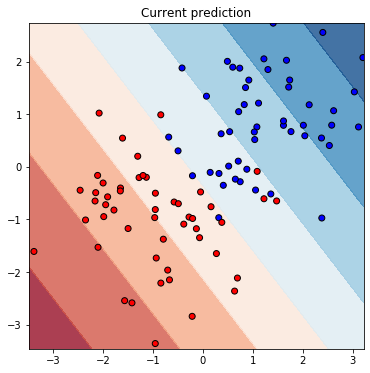

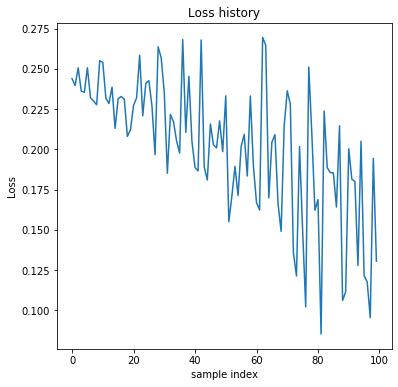

In [0]:
# initialize the neural network
an.w, an.b = an.init_weights()

# Train a single epoch - look at the evolution of the model
loss = []
learning_rate = 0.01
for (x, y) in zip(X_sel, y_sel):
    loss += [an.forward_back_propagation(x, y, False)]
    an.update_parameters(learning_rate)

# make figure
figure = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1)
ax.set_title("Current prediction")
i = 0
y_pred_ravel = np.zeros(len(xx0_ravel))
for (x0, x1) in zip(xx0_ravel, xx1_ravel):
  y_pred_ravel[i] = an.predict(np.array([x0, x1]))
  i += 1
y_pred = y_pred_ravel.reshape(xx0.shape)
ax.set_xlim((np.min(xx0),np.max(xx0)))
ax.set_ylim((np.min(xx1),np.max(xx1)))
ax.contourf(xx0, xx1, y_pred, cmap=cm, alpha=.8)
ax.scatter(X_sel[:, 0], X_sel[:, 1], c=y_sel, cmap=cm_red_blue,
            edgecolors='k')
plt.show()

# plot the loss history
figure = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1)
plt.plot(loss)
ax.set_title("Loss history")
plt.xlabel("sample index")
plt.ylabel("Loss")
plt.show()

Final loss:  0.0542732003142423


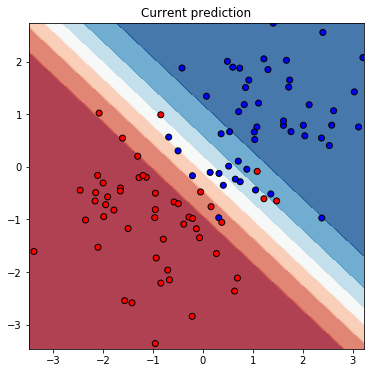

In [0]:
# Take a new neuron
an = ArtificialNeuron2d(act, random_state=random_seed)

# Train N epochs
epochs = 200
learning_rate = 0.1
loss_hist = an.fit(X_sel, y_sel, epochs, learning_rate, batch=10 )
print("Final loss: ", loss_hist[-1])

# predict on all grid points
i = 0
for (x0, x1) in zip(xx0_ravel, xx1_ravel):
  y_pred_ravel[i] = an.predict(np.array([x0, x1]))
  i += 1
y_pred = y_pred_ravel.reshape(xx0.shape)

# Plot current model
figure = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1)
ax.set_xlim((np.min(xx0),np.max(xx0)))
ax.set_ylim((np.min(xx1),np.max(xx1)))
ax.set_title("Current prediction")
ax.contourf(xx0, xx1, y_pred, cmap=cm, alpha=.8)
ax.scatter(X_sel[:, 0], X_sel[:, 1], c=y_sel, cmap=cm_red_blue, edgecolors='k')
plt.show()

In [0]:
figure = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1)
plt.plot(loss_hist)
plt.title("Loss history")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.show()

**Question** : Compare the decision boundaries and the loss histories of stochastic gradient descent (gradient updates on single samples) and mini-batch gradient descent. 

*We see that the learned classifiers are not that different. We see that the orientation has changed a bit, and we see that the values are more marked for the training with several epochs. It remains unclear however whether the accuracy would be really larger.*
*We observe that the loss is much smoother. We also see that the loss can be reduced quite a bit with respect to a single epoch.*

We will now visualize the distribution of predicted scores for the training set.

In [0]:
y_pred = an.predict(X_sel.T)

In [0]:
figure = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1)
plt.hist(y_pred)
plt.title("Distribution of predicted values (training set)")
plt.show()

**Question** : what do you observe ? Can you interpret the values as posterior probabilities? 

*The scores are between 0 and 1 even though this was actually not predefined (no softmax). There is some bi-modality, which is a good sign. Even though the L2 loss was used which is actually not adapted to the problem, it still works reasonably well. There is also a peak in the middle at around 0.5 (probably for unsure candidates). However, even though it might be tempting, these values cannot be considered as probabilities ! (they do not sum to one, and there is no guarantee that they are in [0,1])*

**Assignment**: train a single neuron classifier for each of the data sets. As expected, the performance will be less good. Propose a single neuron classifier that is capable of discriminating the classes. 